In [ ]:
# importing required packages
import numpy
import time


def multiplizeList(size=1000):
  # declaring lists
  list1 = range(size)
  list2 = range(size)

  # capturing time before the multiplication of Python lists
  initialTime = time.time()

  # multiplying elements of both the lists and stored in another list
  resultantList = [(a * b) for a, b in zip(list1, list2)]

  # calculating execution time
  print("Time taken by Lists to perform multiplication:",
    (time.time() - initialTime),
    "seconds")



def multiplizeArray(size=1000):
  # declaring arrays
  array1 = numpy.arange(size)
  array2 = numpy.arange(size)

  # capturing time before the multiplication of Numpy arrays
  initialTime = time.time()

# multiplying elements of both the Numpy arrays and stored in another Numpy array
  resultantArray = array1 * array2

# calculating execution time
  print("Time taken by NumPy Arrays to perform multiplication:",
    (time.time() - initialTime),
    "seconds")


In [ ]:
multiplizeList(100000)
multiplizeArray(100000)

Time taken by Lists to perform multiplication: 0.025510549545288086 seconds
Time taken by NumPy Arrays to perform multiplication: 0.0005364418029785156 seconds


In [ ]:
def matrix_multiply(A, B):
    # Get the number of rows and columns for the input matrices
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])

    # Ensure the number of columns in A is equal to the number of rows in B
    if cols_A != rows_B:
        raise ValueError("Number of columns in A must be equal to number of rows in B")

    # Initialize the result matrix with zeros
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    # Perform the matrix multiplication
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]

    return result




[58, 64]
[139, 154]


In [ ]:
# Example matrices
A = [[1, 2, 3],
    [4, 5, 6]]

B = [[7, 8],
    [9, 10],
    [11, 12]]

# Multiply the matrices
result = matrix_multiply(A, B)

# Print the result
for row in result:
    print(row)

[58, 64]
[139, 154]


In [ ]:
import numpy as np

# Define the matrices
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

B = np.array([
    [7, 8],
    [9, 10],
    [11, 12]
])

# Multiply the matrices using np.dot
result = np.dot(A, B)

# Alternatively, you can use the @ operator
# result = A @ B

# Print the result
print(result)


[[ 58  64]
 [139 154]]


# bài toán IOU(intersection over union) 
- đo lường mức độ trùng khớp giữa hai bounding boxes 
- gồm box dự đoán và box thực tế 
- 

In [ ]:
# iou : intersection over union 
# tìm góc trên bên trái : nằm ở vị trí "tiến vào nhất" so với cả 2 boxes --> max
# tìm góc phải dưới : nằm ở vị trí "lùi ra nhất" so với cả 2 boxes --> min 
def computeIoU(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])

	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# max(0 ,..) : tránh diện tích âm khi không giao nhau 
	# cần cộng 1 vì trên thực tế VD 0 - 9 = 9 - 0 + 1 số 

	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [ ]:
boxA = (0,0,5,5)
boxB = (2.5,2.5,7.5,7.5)
error = computeIoU(boxA,boxB)
print(error)

In [ ]:
# non - maxima suppresion : list & tuples 
# - làm sao để trả về box chính xác nhất  

def non_max_suppression(boxes, overlapThresh):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # initialize the list of picked indexes
    pick = []
    # grab the coordinates of the bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    c = boxes[:, 4]

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    print(area)
    idxs = np.argsort(c)
    print(idxs)
    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]
        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
                                               np.where(overlap > overlapThresh)[0])))
    # return only the bounding boxes that were picked using the
    # integer data type
    return boxes[pick].astype("int")

In [ ]:
boundingBoxes = np.array([
	(12, 84, 140, 212, 0.3),
	(24, 84, 152, 212, 0.4),
	(36, 84, 164, 212, 0.5),
	(12, 96, 140, 224, 0.6),
	(24, 96, 152, 224, 0.7),
	(24, 108, 152, 236, 0.8)])
pick = non_max_suppression(boundingBoxes, 0.3)
print(pick)

[16641. 16641. 16641. 16641. 16641. 16641.]
[0 1 2 3 4 5]
[[ 24 108 152 236   0]]


24 108 152 236


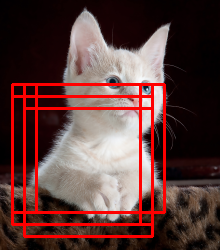

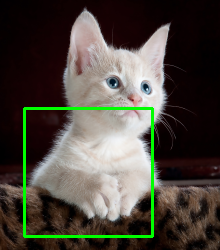

In [ ]:
# import the necessary packages
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

boundingBoxes = np.array([
	(12, 84, 140, 212, 0.3),
	(24, 84, 152, 212, 0.4),
	(36, 84, 164, 212, 0.5),
	(12, 96, 140, 224, 0.6),
	(24, 96, 152, 224, 0.7),
	(24, 108, 152, 236, 0.8)])

# load the image and clone it
image = cv2.imread("/content/cat_nms.png")
orig = image.copy()
# loop over the bounding boxes for each image and draw them
for (startX, startY, endX, endY, confidence) in boundingBoxes:
	cv2.rectangle(orig, (int(startX), int(startY)), (int(endX), int(endY)), (0, 0, 255), 2)
# perform non-maximum suppression on the bounding boxes
pick = non_max_suppression(boundingBoxes, 0.3)
# loop over the picked bounding boxes and draw them
for (startX, startY, endX, endY, confidence) in pick:
   print(startX,startY,endX,endY)
   cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
# display the images
cv2_imshow(orig)
cv2_imshow(image)

In [1]:
import numpy as np

def non_max_suppression(boxes, scores, iou_threshold):
    """
    Perform non-maxima suppression.

    Parameters:
    - boxes: a list of bounding boxes, each specified by a list [x1, y1, x2, y2].
    - scores: a list of scores corresponding to each bounding box.
    - iou_threshold: the IoU threshold to use for filtering.

    Returns:
    - A list of indices of the boxes that are kept after non-maxima suppression.
    """

    # Convert boxes to a numpy array for easier manipulation
    boxes = np.array(boxes)
    scores = np.array(scores)

    # Coordinates of bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    # Compute the area of the bounding boxes
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)

    # Sort the bounding boxes by the scores in descending order
    order = scores.argsort()[::-1]

    keep = []  # List to store the indices of boxes to keep

    while order.size > 0:
        i = order[0]  # Index of the current highest score box
        keep.append(i)

        # Compute the intersection areas
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        inter = w * h

        # Compute the IoU
        iou = inter / (areas[i] + areas[order[1:]] - inter)

        # Get indices of boxes with IoU less than the threshold
        inds = np.where(iou <= iou_threshold)[0]

        # Update order, only keep boxes with IoU less than the threshold
        order = order[inds + 1]

    return keep

# Example usage
boxes = [
    [100, 100, 210, 210],
    [105, 105, 215, 215],
    [150, 150, 300, 300]
]
scores = [0.9, 0.8, 0.7]
iou_threshold = 0.3

kept_indices = non_max_suppression(boxes, scores, iou_threshold)
kept_boxes = [boxes[i] for i in kept_indices]

print("Kept indices:", kept_indices)
print("Kept boxes:", kept_boxes)


Kept indices: [0, 2]
Kept boxes: [[100, 100, 210, 210], [150, 150, 300, 300]]


In [ ]:

def non_max_suppression(boxes, scores, iou_threshold):
    """
    Perform non-maxima suppression using lists only.

    Parameters:
    - boxes: a list of bounding boxes, each specified by a list [x1, y1, x2, y2].
    - scores: a list of scores corresponding to each bounding box.
    - iou_threshold: the IoU threshold to use for filtering.

    Returns:
    - A list of indices of the boxes that are kept after non-maxima suppression.
    """

    def compute_iou(box1, box2):
        """
        Compute the Intersection over Union (IoU) of two bounding boxes.

        Parameters:
        - box1, box2: lists of four integers [x1, y1, x2, y2]

        Returns:
        - IoU value as a float
        """
        x1_1, y1_1, x2_1, y2_1 = box1
        x1_2, y1_2, x2_2, y2_2 = box2

        # Compute the coordinates of the intersection rectangle
        xx1 = max(x1_1, x1_2)
        yy1 = max(y1_1, y1_2)
        xx2 = min(x2_1, x2_2)
        yy2 = min(y2_1, y2_2)

        # Compute the width and height of the intersection rectangle
        w = max(0, xx2 - xx1 + 1)
        h = max(0, yy2 - yy1 + 1)

        # Compute the area of the intersection rectangle
        inter_area = w * h

        # Compute the area of both bounding boxes
        box1_area = (x2_1 - x1_1 + 1) * (y2_1 - y1_1 + 1)
        box2_area = (x2_2 - x1_2 + 1) * (y2_2 - y1_2 + 1)

        # Compute the Intersection over Union (IoU)
        iou = inter_area / float(box1_area + box2_area - inter_area)

        return iou

    # Sort the boxes by scores in descending order
    sorted_indices = sorted(range(len(scores)), key=lambda k: scores[k], reverse=True)

    keep = []  # List to store the indices of boxes to keep

    while sorted_indices:
        i = sorted_indices.pop(0)  # Index of the current highest score box
        keep.append(i)

        filtered_indices = []
        for j in sorted_indices:
            iou = compute_iou(boxes[i], boxes[j])
            if iou <= iou_threshold:
                filtered_indices.append(j)

        sorted_indices = filtered_indices

    return keep

# Example usage
boxes = [
    [100, 100, 210, 210],
    [105, 105, 215, 215],
    [150, 150, 300, 300]
]
scores = [0.9, 0.8, 0.7]
iou_threshold = 0.5

kept_indices = non_max_suppression(boxes, scores, iou_threshold)
kept_boxes = [boxes[i] for i in kept_indices]

print("Kept indices:", kept_indices)
print("Kept boxes:", kept_boxes)


Kept indices: [0, 2]
Kept boxes: [[100, 100, 210, 210], [150, 150, 300, 300]]


In [4]:
# Refine for class
def non_max_suppression(boxes, scores, iou_threshold):

    def compute_iou(box1, box2):
        x1_1, y1_1, x2_1, y2_1 = box1
        x1_2, y1_2, x2_2, y2_2 = box2

        # Compute the coordinates of the intersection rectangle
        xx1 = max(x1_1, x1_2)
        yy1 = max(y1_1, y1_2)
        xx2 = min(x2_1, x2_2)
        yy2 = min(y2_1, y2_2)

        # Compute the width and height of the intersection rectangle
        w = max(0, xx2 - xx1 + 1)
        h = max(0, yy2 - yy1 + 1)

        # Compute the area of the intersection rectangle
        inter_area = w * h

        # Compute the area of both bounding boxes
        box1_area = (x2_1 - x1_1 + 1) * (y2_1 - y1_1 + 1)
        box2_area = (x2_2 - x1_2 + 1) * (y2_2 - y1_2 + 1)

        # Compute the Intersection over Union (IoU)
        iou = inter_area / float(box1_area + box2_area - inter_area)

        return iou

    # Sort the boxes by scores in descending order
    sorted_indices = sorted(range(len(scores)), key=lambda k: scores[k], reverse=True)

    keep = []  # List to store the indices of boxes to keep

    while sorted_indices:
        i = sorted_indices.pop(0)  # Index of the current highest score box
        keep.append(i)
        # print("sorted_indices", sorted_indices)
        filtered_indices = []
        for j in sorted_indices:
            iou = compute_iou(boxes[i], boxes[j])
            if iou <= iou_threshold:
                filtered_indices.append(j)

        sorted_indices = filtered_indices

    return keep

# Example usage
boxes = [
    [12, 84, 140, 212],
    [24, 84, 152, 212],
    [36, 84, 164, 212],
    [12, 96, 140, 224],
    [24, 96, 152, 224],
    [24, 108, 152, 236]
]

scores = [0.3, 0.4, 0.5, 0.6, 0.7]
iou_threshold = 0.3

kept_indices = non_max_suppression(boxes, scores, iou_threshold)
kept_boxes = [boxes[i] for i in kept_indices]

print("Kept indices:", kept_indices)
print("Kept boxes:", kept_boxes)


sorted_indices [3, 2, 1, 0]
Kept indices: [4]
Kept boxes: [[24, 96, 152, 224]]


In [ ]:
import numpy as np

dataset = np.array(['Ho Chi Minh', 'Da Nang',
                 'Ho Chi Minh', 'Da Nang','Can Tho'])

# Initialize an empty set to store unique categories
unique_categories = set()

# Iterate through the dataset and add categories to the set
for data in dataset:
    unique_categories.add(data)

# Convert the set to a sorted list to maintain order
unique_categories = sorted(list(unique_categories))

# Create a mapping from category to index
category_to_index = {category: idx for idx, category in enumerate(unique_categories)}

# Initialize an empty list to store the one-hot encoded features
one_hot_encoded_features = []

# Perform one-hot encoding
for data in dataset:
    one_hot_vector = [0] * len(unique_categories)
    one_hot_vector[category_to_index[data]] = 1
    one_hot_encoded_features.append(one_hot_vector)

# Print the unique categories and one-hot encoded features
print("One-Hot Encoded Features:\n", one_hot_encoded_features)
print(unique_categories)

One-Hot Encoded Features:
 [[0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0]]
['Can Tho', 'Da Nang', 'Ho Chi Minh']


In [ ]:
boundingBoxes = np.array([
	(12, 84, 140, 212, 0.3),
	(24, 84, 152, 212, 0.4),
	(36, 84, 164, 212, 0.5),
	(12, 96, 140, 224, 0.6),
	(24, 96, 152, 224, 0.7),
	(24, 108, 152, 236, 0.8)])

[ 84.  84.  84.  96.  96. 108.]


In [ ]:
print(boundingBoxes)

[[ 12.   84.  140.  212.    0.3]
 [ 24.   84.  152.  212.    0.4]
 [ 36.   84.  164.  212.    0.5]
 [ 12.   96.  140.  224.    0.6]
 [ 24.   96.  152.  224.    0.7]
 [ 24.  108.  152.  236.    0.8]]


In [ ]:
from graphviz import Graph
import math
# cấu trúc dữ liệu và vẽ cây 
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right

def add_edges(dot, node):
    if node is None:
        return
    if node.left:
        dot.edge(str(node.point), str(node.left.point))
        add_edges(dot, node.left)
    if node.right:
        dot.edge(str(node.point), str(node.right.point))
        add_edges(dot, node.right)

def draw_tree(root):
    dot = Graph()
    dot.node(str(root.point))
    add_edges(dot, root)
    return dot

# xây dựng kd - tree 
def build_kd_tree(points, depth=0):
    # kiểm tra rỗng 
    if not points:
        return None

    # xác định số chiều và trục chia 
    # len(điểm đầu tiên trong list) = số chiều , 0 là x , 1 là y 
    k = len(points[0])  # Assumes all points have the same dimension
    axis = depth % k # độ sâu của node hiện tại % số chiều ==> luân phiên x , y 
    print("axis", axis)

    # sắp xếp và tìm điểm giữa 
    points.sort(key=lambda x: x[axis])
    median = len(points) // 2 # // tức chia rồi làm tròn xuống thay vì dùng hàm round 
    print("poinst", points[median])
    print("median", median)
    print("____________________")
    
    # trả về node với cây con 
    return Node(
        point=points[median],
        left=build_kd_tree(points[:median], depth + 1),
        right=build_kd_tree(points[median + 1:], depth + 1)
    )

# Tính Euclidean distance: √[(x₁-x₂)² + (y₁-y₂)²]
def distance_squared(point1, point2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

def closer_point(new_data, nearest_node, root_node):
    if nearest_node is None:
        return root_node
    if root_node is None:
        return nearest_node
    if distance_squared(new_data, nearest_node) < distance_squared(new_data, root_node):
        return nearest_node
    return root_node


def nearest_neighbor(node, point, depth=0, best=None):
    if node is None:
        return best

    k = len(point)
    axis = depth % k

    next_branch = None
    opposite_branch = None

    # đi sang trái 
    if point[axis] < node.point[axis]:
        next_branch = node.left
        opposite_branch = node.right
    # đi sang phải 
    else:
        next_branch = node.right
        opposite_branch = node.left

    best = closer_point(point, nearest_neighbor(next_branch, point, depth + 1, best), node.point)

    if (point[axis] - node.point[axis]) ** 2 < distance_squared(point, best):
        best = closer_point(point, nearest_neighbor(opposite_branch, point, depth + 1, best), best)

    return best

# Example usage
points = [(1, 2), (2, 6), (3, 4), (5, 6), (7, 8), (8, 3)]
kd_tree = build_kd_tree(points)

query_point = (6, 5)
nearest = nearest_neighbor(kd_tree, query_point)

print("Nearest neighbor to {}: {}".format(query_point, nearest))


axis 0
poinst (5, 6)
median 3
____________________
axis 1
poinst (3, 4)
median 1
____________________
axis 0
poinst (1, 2)
median 0
____________________
axis 0
poinst (2, 6)
median 0
____________________
axis 1
poinst (7, 8)
median 1
____________________
axis 0
poinst (8, 3)
median 0
____________________
Nearest neighbor to (6, 5): (5, 6)



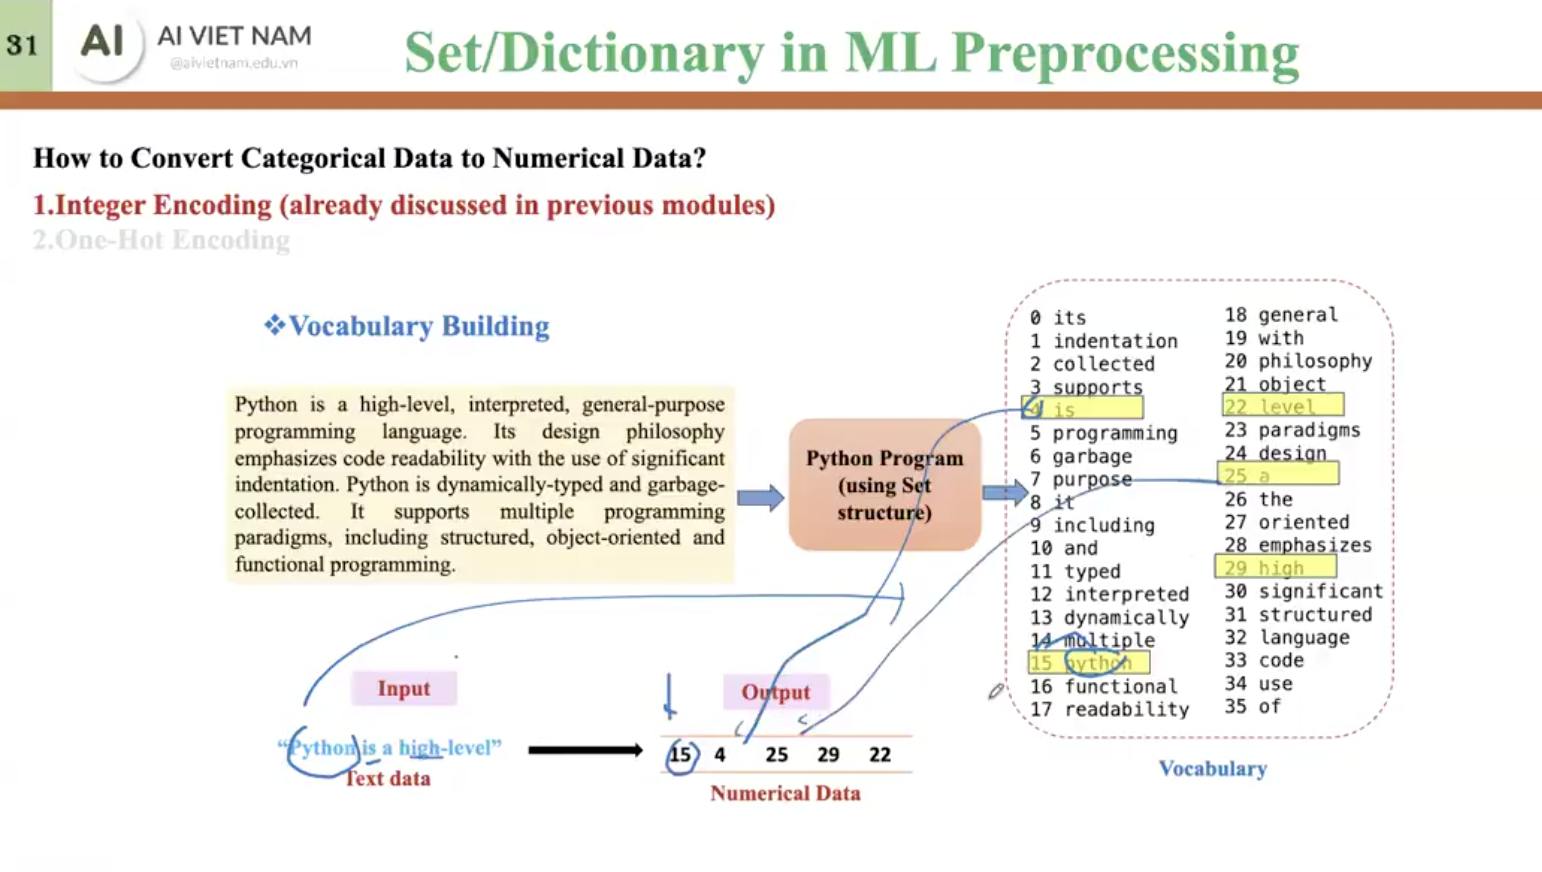

In [1]:
""" review set , dictoinary """
import base64
from IPython.display import HTML, display
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode()
    return encoded_string

# Sử dụng
image_path = "/Users/macos/AIO/module 1 /w4/T3/1.Tuesday/Ảnh màn hình 2025-10-22 lúc 15.42.34.png"
base64_data = image_to_base64(image_path)

# Hiển thị ảnh từ base64
display(HTML(f'<img src="data:image/jpeg;base64,{base64_data}" width="300">'))


In [10]:
dot = draw_tree(kd_tree)
dot.render('kd_tree', format='png', view=True)

'kd_tree.png'

In [ ]:
# Example usage
points = [(2, 2), (4, 4), (6, 6), (8, 8), (10, 10)]
kd_tree = build_kd_tree(points)

axis 0
poinst (6, 6)
median 2
____________________
axis 1
poinst (4, 4)
median 1
____________________
axis 0
poinst (2, 2)
median 0
____________________
axis 1
poinst (10, 10)
median 1
____________________
axis 0
poinst (8, 8)
median 0
____________________


In [ ]:
distance_squared((6,5),(8,3))

2.8284271247461903

In [21]:
print(5%3)

2
